              year  selling_price     km_driven      mileage       engine  \
count  8128.000000   8.128000e+03  8.128000e+03  8128.000000  8128.000000   
mean   2013.804011   6.382718e+05  6.981951e+04    19.418783  1458.625016   
std       4.044249   8.062534e+05  5.655055e+04     3.981875   497.017504   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.418783  1248.000000   
75%    2017.000000   6.750000e+05  9.800000e+04    22.277500  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  8128.000000  8128.000000  
mean     91.506353     5.416719  
std      35.357821     0.946450  
min       0.000000     2.000000  
25%      68.100000     5.000000  
50%      83.100000     5.000000  
75%     101.250000     5.000000  
max     400.000000    14.000000  


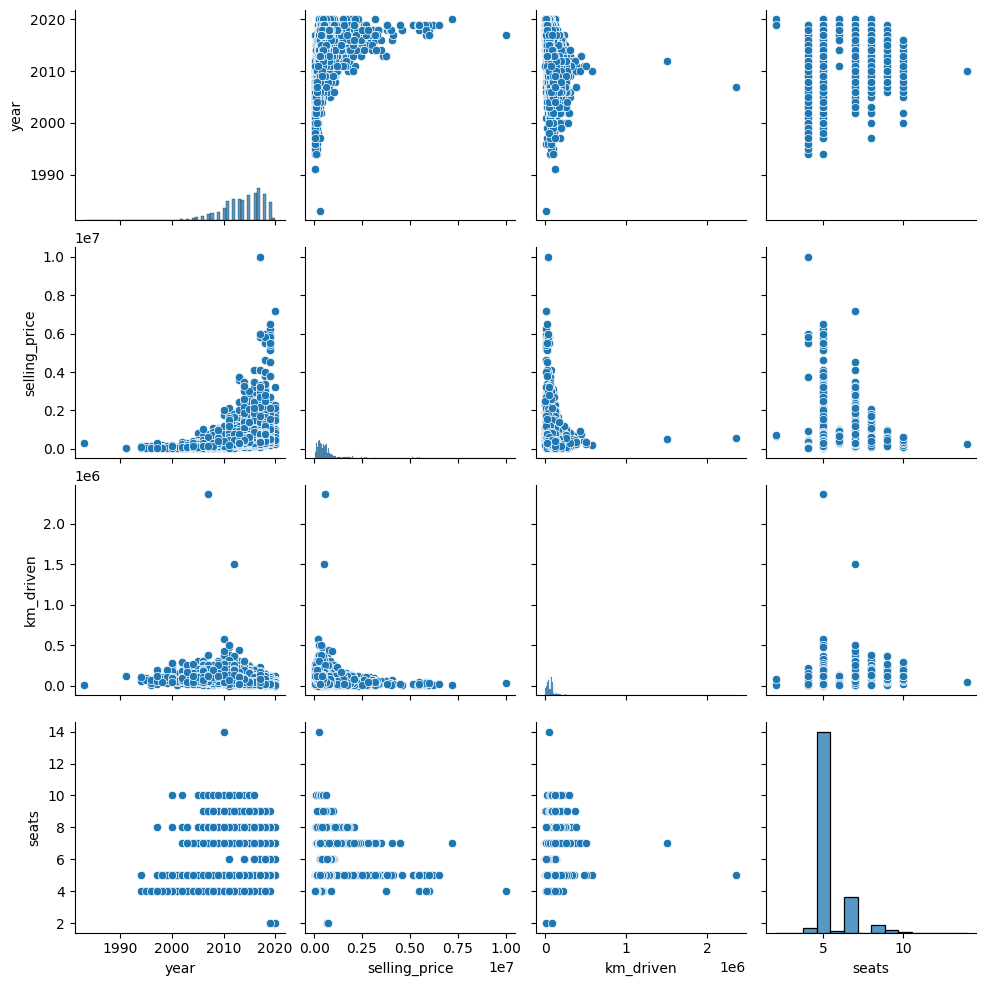

<Figure size 1000x800 with 0 Axes>

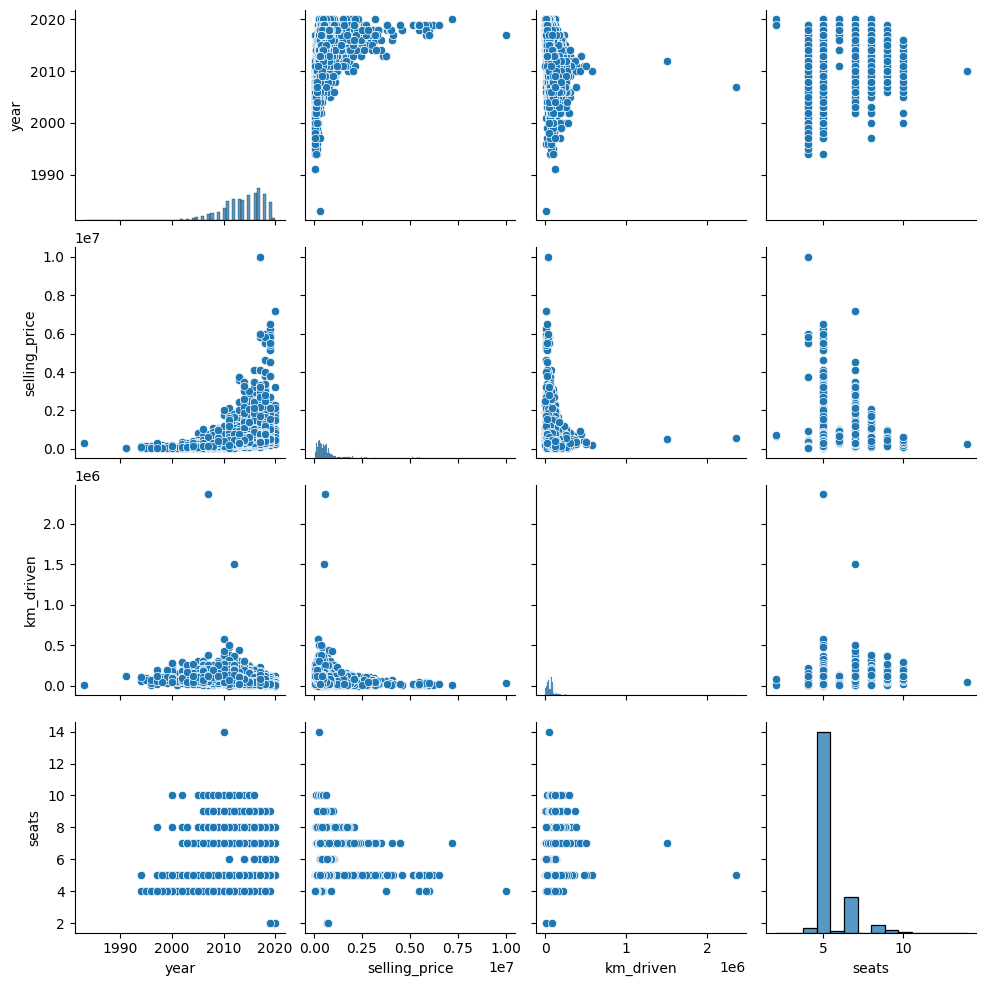

<Figure size 1000x800 with 0 Axes>

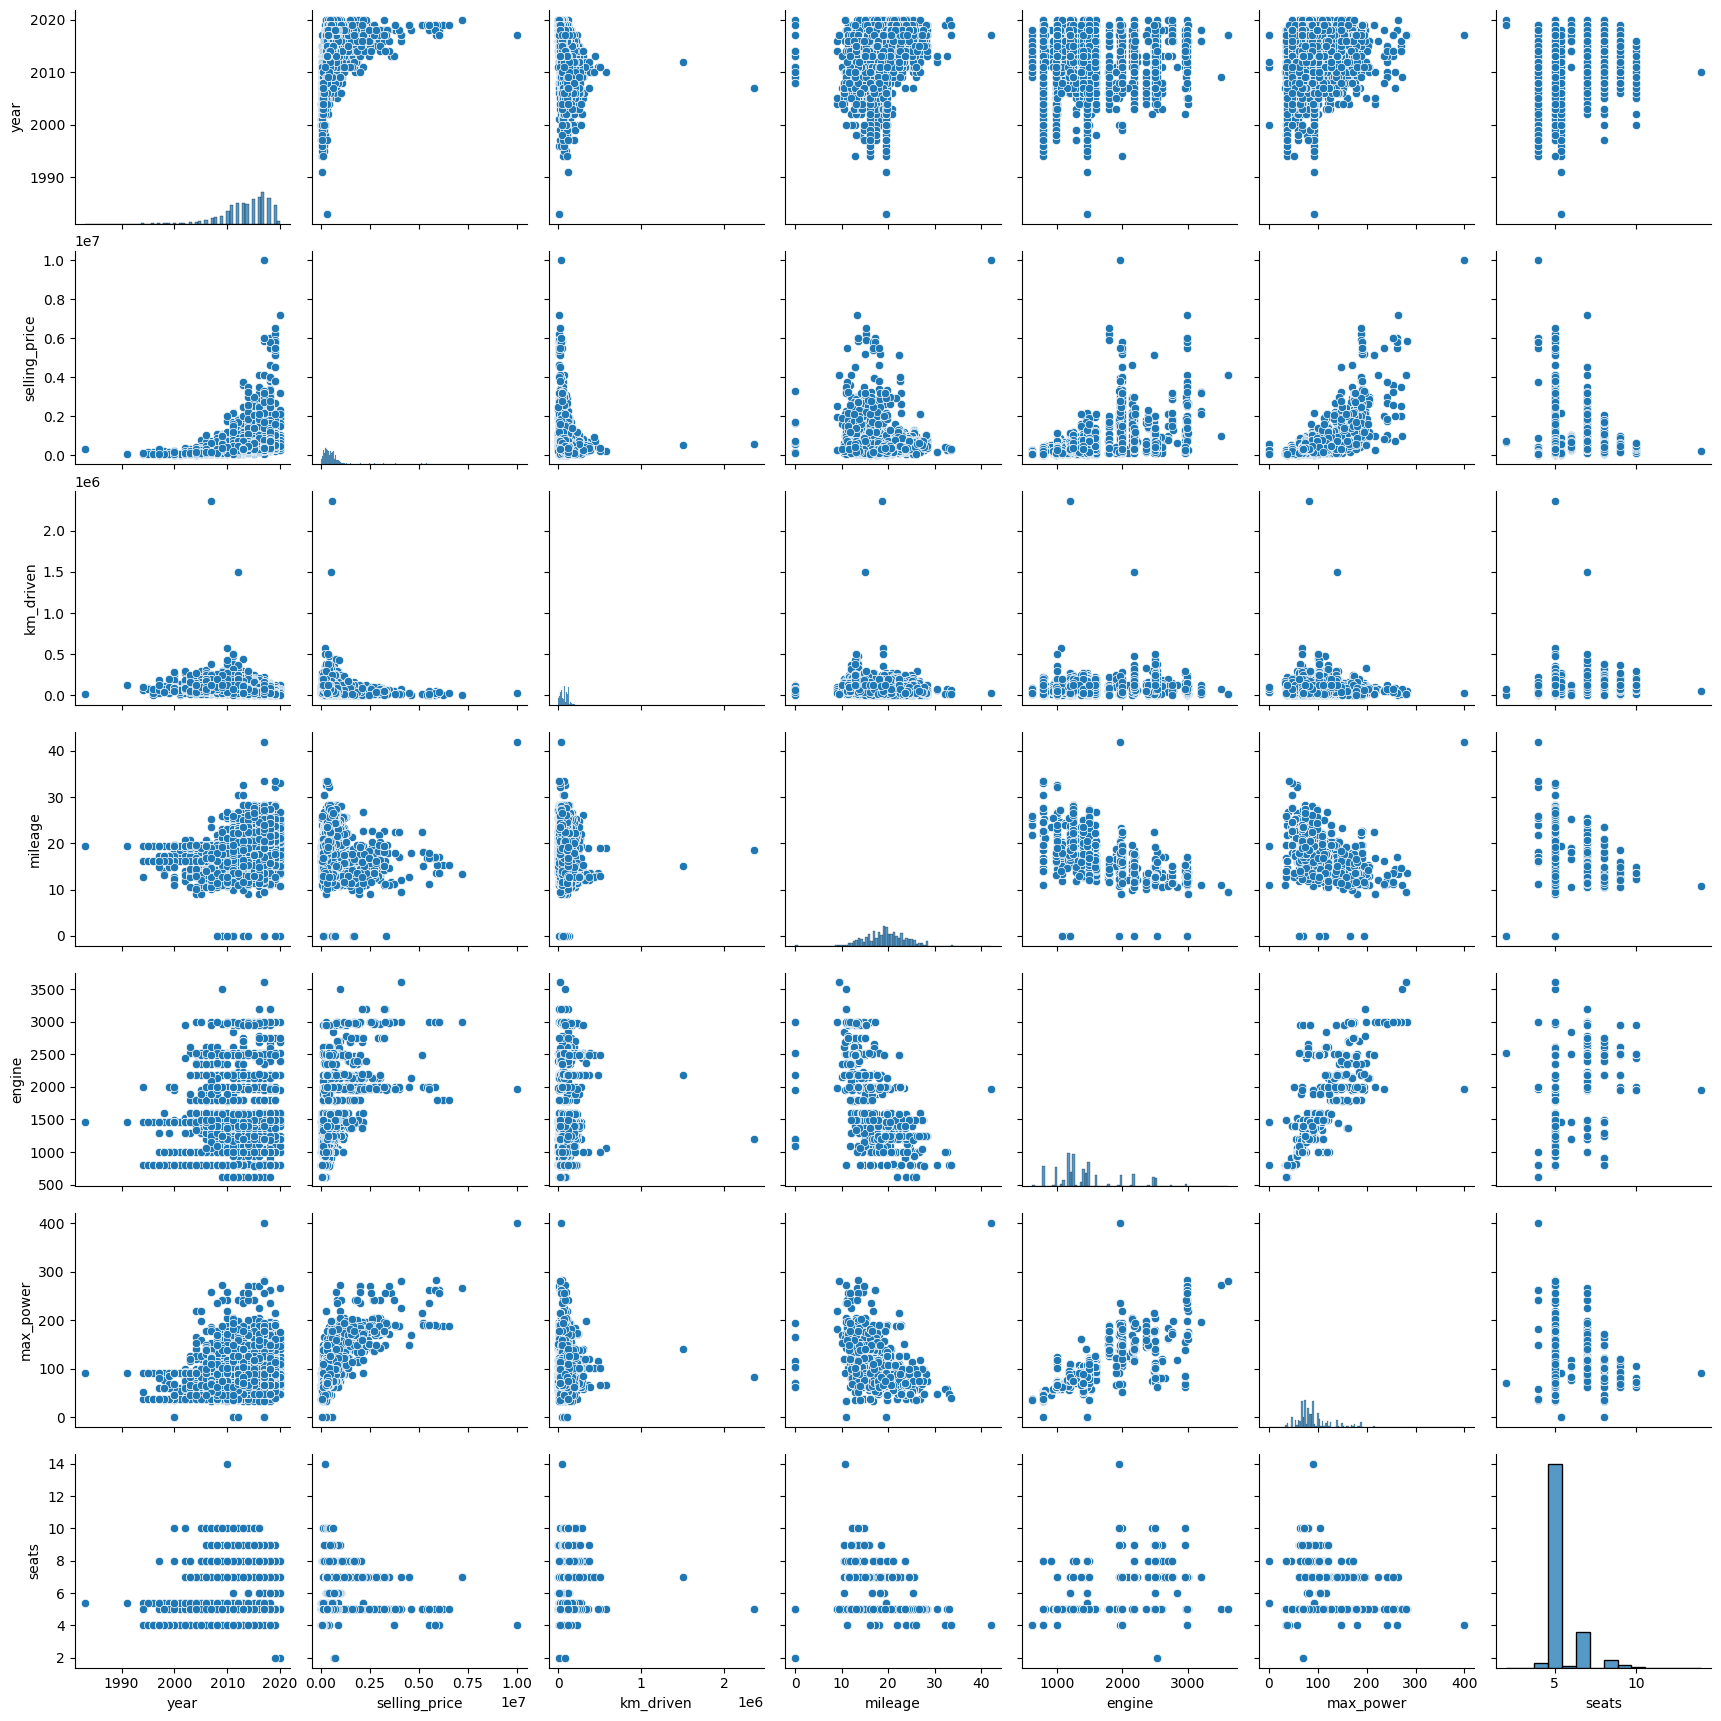

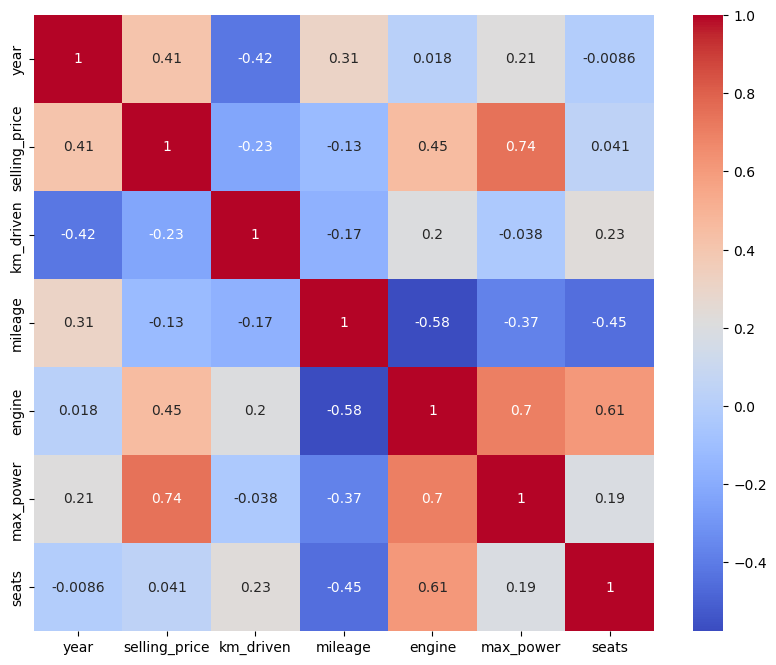

Mean Squared Error: 201067304566.54645
R^2 Score: 0.6932538864806379
Mean Absolute Error: 267851.9453119057


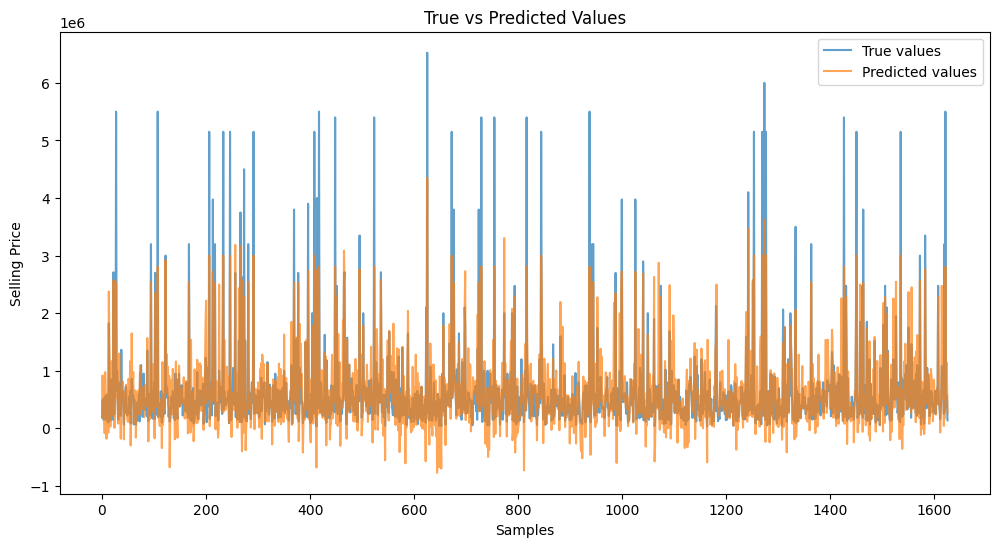

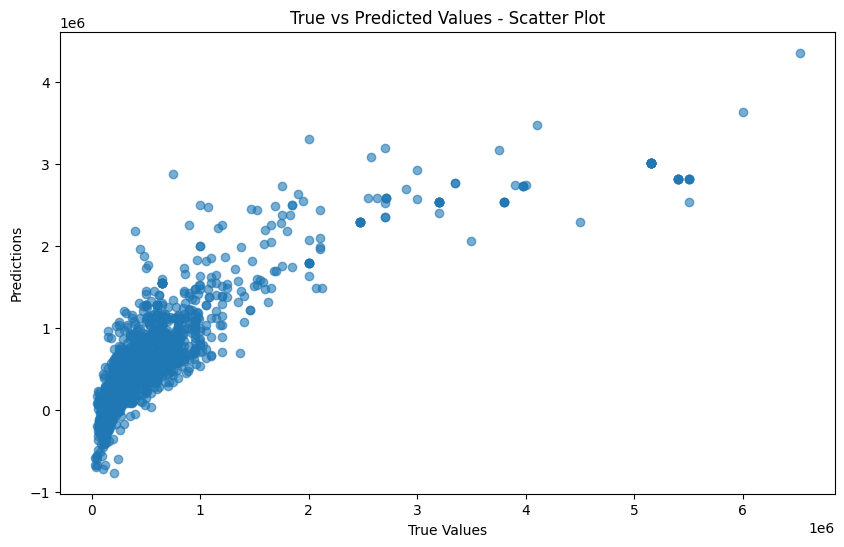

Interpretación: El modelo de regresión lineal presenta un error cuadrático medio (MSE) de 201067304566.55, lo cual indica el promedio de los errores cuadráticos. El R^2 Score de 0.69 muestra que el modelo explica aproximadamente el 69.33% de la variabilidad de los datos. El error absoluto medio (MAE) de 267851.95 representa el promedio de las diferencias absolutas entre las predicciones y los valores reales. Estos resultados sugieren que el modelo tiene un rendimiento aceptable, aunque se podrían explorar otros algoritmos para mejorar la precisión.


In [7]:
# Instalación de librerías necesarias (en Jupyter Notebook ejecutar celda)
%pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('Car details v3.csv')

# Preprocesamiento de Datos
# Convertir las columnas numéricas con unidades (mileage, engine, max_power)
data['mileage'] = data['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['engine'] = data['engine'].str.replace(' CC', '').astype(float)
data['max_power'] = data['max_power'].str.replace(' bhp', '').replace('', '0').astype(float)

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
data[['mileage', 'engine', 'max_power', 'seats']] = imputer.fit_transform(data[['mileage', 'engine', 'max_power', 'seats']])

# Análisis Exploratorio de Datos (EDA)
print(data.describe())
print(data.info())

# Asegurarse de que sólo columnas numéricas se utilicen para la correlación
data_numeric = data.select_dtypes(include=[np.number])

# Gráficos para identificar relaciones y valores atípicos
sns.pairplot(data_numeric)
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

# Seleccionar variables relevantes
X = data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = data['selling_price']

# Aplicar One Hot Encoding a las variables categóricas
X = pd.get_dummies(X, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selección de Características con RFE
model = LinearRegression()
selector = RFE(model, n_features_to_select=8)
selector = selector.fit(X_scaled, y)
X_selected = selector.transform(X_scaled)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Mean Absolute Error:', mae)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True values', alpha=0.7)
plt.plot(y_pred, label='Predicted values', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('Selling Price')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Gráfico de dispersión para analizar el ajuste del modelo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values - Scatter Plot')
plt.show()

# Interpretación de Resultados
print("Interpretación: El modelo de regresión lineal presenta un error cuadrático medio (MSE) de {:.2f}, lo cual indica el promedio de los errores cuadráticos. El R^2 Score de {:.2f} muestra que el modelo explica aproximadamente el {:.2f}% de la variabilidad de los datos. El error absoluto medio (MAE) de {:.2f} representa el promedio de las diferencias absolutas entre las predicciones y los valores reales. Estos resultados sugieren que el modelo tiene un rendimiento aceptable, aunque se podrían explorar otros algoritmos para mejorar la precisión.".format(mse, r2, r2 * 100, mae))
